In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#각 이미지는 28*28, 회색 스케일이며 숫자 0~255 정수로 이루어져 있음
#따라서 간단하게 255.0로 나눔으로써 (0~255)->(0.0~1.0) 변환 
X_train=X_train / 255.0
X_test=X_test/255.0 #표준화

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]), #input shape 입력층
    tf.keras.layers.Dense(300,activation='relu'), #은닉층, 유닛의 수 300, relu 
    tf.keras.layers.Dense(100,activation='relu'), #은닉층, 유닛의 수 100
    tf.keras.layers.Dense(10,activation='softmax') #출력층 범주가 10개 이므로 유닛의 수 반드시 10개, 다진 분류이기 떄문에 softmax!
])

In [5]:
#모델 컴파일 : 손실함수, 최적화알고리즘, 지표
model.compile(loss='sparse_categorical_crossentropy', #sparse는 원핫인코딩하면 없고 인덱스로 하기 때문에 sparse을 붙어야함
             optimizer='sgd',#확률적 경사 하강법
             metrics=['accuracy'])

In [6]:
#모델 훈련
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7396 - accuracy: 0.7564 - val_loss: 0.5329 - val_accuracy: 0.8152
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4903 - accuracy: 0.8299 - val_loss: 0.5508 - val_accuracy: 0.8018
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4447 - accuracy: 0.8448 - val_loss: 0.4579 - val_accuracy: 0.8430
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4176 - accuracy: 0.8538 - val_loss: 0.4041 - val_accuracy: 0.8553
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3972 - accuracy: 0.8605 - val_loss: 0.3997 - val_accuracy: 0.8535
Epoch 6/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3822 - accuracy: 0.8655 - val_loss: 0.3881 - val_accuracy: 0.8625
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3681 - accuracy: 0.8711 - val_loss: 0.3853 - val_accuracy:

In [7]:
type(history)

tensorflow.python.keras.callbacks.History

<AxesSubplot:>

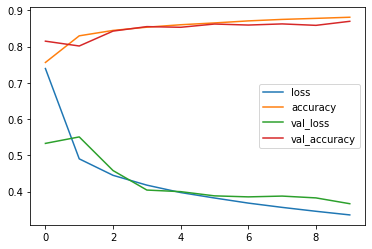

In [8]:
#history 활용
#그림 그리기
#X축 에포크
#학습곡선이라고 부름
pd.DataFrame(history.history).plot()

In [9]:
#예측방법
#결과가 값이 10개씩 있음 -> 각 범주에 속할 확률을 의미
#즉 가장 큰 값의 번호를 찾기
model.predict(X_test[:3])

array([[7.9471010e-06, 7.9595475e-06, 3.6379257e-05, 4.5097433e-05,
        4.4382941e-05, 3.6046945e-02, 1.7040576e-04, 3.1133142e-01,
        1.9052618e-03, 6.5040410e-01],
       [9.5671247e-05, 2.6170903e-07, 9.6748233e-01, 8.6779937e-06,
        2.0613361e-02, 1.0682362e-09, 1.1792075e-02, 1.7382363e-09,
        7.4402151e-06, 1.1192783e-08],
       [4.3589294e-05, 9.9990654e-01, 4.7251360e-06, 3.2067710e-05,
        1.0892752e-05, 9.5151842e-09, 4.9704823e-07, 8.0134903e-09,
        1.6945012e-06, 6.0660570e-09]], dtype=float32)

In [10]:
np.argmax(model.predict(X_test[:3]),axis=1) #예측값

array([9, 2, 1], dtype=int64)

In [11]:
y_test[:3] #진짜 값

array([9, 2, 1], dtype=uint8)

In [12]:
#정확도
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8624


[0.38736313581466675, 0.8623999953269958]

In [13]:
p=np.argmax(model.predict(X_test),axis=1) #confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,p) #대각선을 정확하게 맞친것

array([[784,   0,   8,  64,   2,   2, 127,   0,  13,   0],
       [  3, 956,   2,  29,   3,   0,   6,   0,   1,   0],
       [ 13,   2, 715,  19, 144,   0, 100,   1,   6,   0],
       [ 15,   5,  10, 915,  21,   0,  29,   0,   5,   0],
       [  0,   1,  63,  58, 800,   1,  74,   0,   3,   0],
       [  0,   0,   0,   1,   0, 942,   0,  45,   1,  11],
       [113,   1,  66,  51,  89,   0, 667,   0,  13,   0],
       [  0,   0,   0,   0,   0,  15,   0, 973,   2,  10],
       [  2,   1,   4,  11,   2,   1,  16,   7, 956,   0],
       [  0,   0,   0,   0,   0,   9,   0,  74,   1, 916]], dtype=int64)